In [108]:
%load_ext autoreload

%autoreload 2

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [111]:
import helper

In [127]:
df = pd.read_csv('./dataset/customers.csv', delimiter= ';', low_memory= False)
df.shape

(191652, 369)

In [128]:
df.dtypes.value_counts()

float64    267
int64       94
object       8
dtype: int64

## 1. Missing Values

### Missing values in feature space

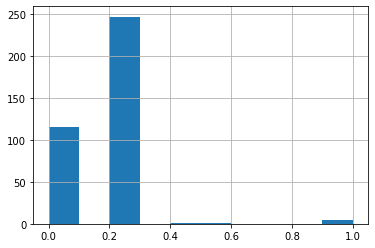

In [129]:
na_col = df.isna().mean(axis= 0).round(2)
# Visualize the missing values in feature space
na_col.hist()

# Make shure the count is done per column
assert(na_col.shape[0] == df.shape[1])

In [130]:
na_col.value_counts().sort_index(ascending= False)

1.00      1
0.99      1
0.97      1
0.94      1
0.58      1
0.44      1
0.29     64
0.28     12
0.27    118
0.26     28
0.25     12
0.24     12
0.23      1
0.02     20
0.00     96
dtype: int64

In [131]:
# Which columns have more than 40% missing
na_col.loc[na_col > .4]

ALTER_KIND1     0.94
ALTER_KIND2     0.97
ALTER_KIND3     0.99
ALTER_KIND4     1.00
EXTSEL992       0.44
KK_KUNDENTYP    0.58
dtype: float64

In [143]:
# Remove the columns that have more than 90% missing:
cols_drop = na_col.loc[na_col > .9].index.values

df = df.drop(cols_drop, axis= 1)

### Missing values per Observation (row-wise)

<AxesSubplot:>

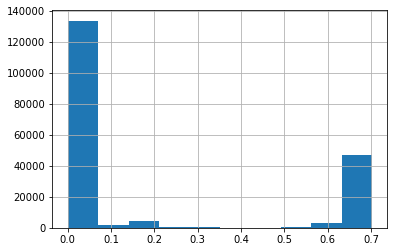

In [132]:
na_row = df.isnull().mean(axis= 1).sort_values(ascending= False)
na_row.hist()

In [133]:
# About a 1/3 of the customers have missing values
# in more than half of their features
df['flag_na'] = na_row >= .5
df['flag_na'].value_counts()

False    140901
True      50751
Name: flag_na, dtype: int64

In [134]:
## Compare and contrast the two "groups" of customers in feature space

df.loc[df['flag_na'] == 1, 'FINANZ_MINIMALIST'].value_counts().sort_index()

1       33
2       74
3    46809
4     1134
5     2701
Name: FINANZ_MINIMALIST, dtype: int64

In [135]:
df.loc[df['flag_na'] == 0, 'FINANZ_MINIMALIST'].value_counts().sort_index()

1     1716
2     9779
3    19630
4    28028
5    81748
Name: FINANZ_MINIMALIST, dtype: int64

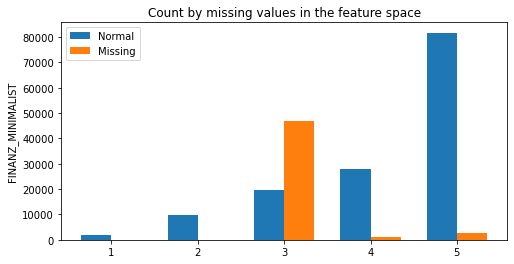

In [139]:
labels = list(range(1, 6))
normal = df.loc[df['flag_na'] == 0, 'FINANZ_MINIMALIST'].value_counts().sort_index()
missing = df.loc[df['flag_na'] == 1, 'FINANZ_MINIMALIST'].value_counts().sort_index()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize= (8, 4))
rects1 = ax.bar(x - width/2, normal, width, label= 'Normal')
rects2 = ax.bar(x + width/2, missing, width, label= 'Missing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('FINANZ_MINIMALIST')
ax.set_title('Count by missing values in the feature space')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

## 2. Non-numeric columns

In [144]:
df.columns

Index(['LNR', 'AGER_TYP', 'AKT_DAT_KL', 'ALTER_HH', 'ALTERSKATEGORIE_FEIN',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_KINDER', 'ANZ_PERSONEN',
       'ANZ_STATISTISCHE_HAUSHALTE',
       ...
       'W_KEIT_KIND_HH', 'WOHNDAUER_2008', 'WOHNLAGE', 'ZABEOTYP',
       'PRODUCT_GROUP', 'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'ANREDE_KZ',
       'ALTERSKATEGORIE_GROB', 'flag_na'],
      dtype='object', length=366)

In [145]:
cols_obj = df.select_dtypes('O')
cols_obj.columns

Index(['CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'CAMEO_INTL_2015',
       'D19_LETZTER_KAUF_BRANCHE', 'EINGEFUEGT_AM', 'OST_WEST_KZ',
       'PRODUCT_GROUP', 'CUSTOMER_GROUP'],
      dtype='object')